# Tarea 6
### Jose Morales Rendon
#### Matrícula: 1501126

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    RocCurveDisplay, PrecisionRecallDisplay)

In [2]:
df = pd.read_csv("BankChurners.csv")

#### Algoritmos supervisados aplicables al problema de churn bancario
El problema de predecir si un cliente abandonará los servicios de una institución financiera (churn) pertenece a la categoría de aprendizaje supervisado, específicamente de clasificación binaria, ya que la variable objetivo (Attrition_Flag) puede tomar dos valores:

1 = cliente que abandonó

0 = cliente retenido.

A continuación, se describen los algoritmos más adecuados y su fundamento matemático.

#### a) Regresión Logística

Es el modelo lineal más utilizado para problemas de clasificación binaria.

Ventajas:

Fácil interpretación: los coeficientes indican la dirección e intensidad del efecto de cada variable.

Ideal para datasets medianos y con variables tanto categóricas como numéricas.

Permite analizar odds ratios, útiles en un contexto de negocio.

Por qué conviene usarlo:
Permite comunicar de manera clara qué factores incrementan o reducen la probabilidad de abandono (por ejemplo, bajo número de transacciones o límite de crédito bajo.


#### b) Árboles de Decisión

Dividen el espacio de los datos en regiones homogéneas mediante reglas tipo “si-entonces”.
Su criterio matemático se basa en minimizar la impureza de los nodos, comúnmente con el índice Gini o la entropía:

Ventajas:

Interpretables: permiten visualizar rutas de decisión.

Capturan interacciones no lineales entre variables.

No requieren normalización ni escalamiento.

Por qué conviene usarlo:
En churn bancario, los árboles permiten identificar combinaciones críticas, como clientes con baja actividad y alto saldo rotativo, que elevan el riesgo de salida.


#### c) Random Forest

Es un ensemble de múltiples árboles de decisión construidos sobre muestras aleatorias del dataset (bagging).
La predicción final se obtiene mediante el promedio o voto mayoritario de los árboles:

Ventajas:

Reduce el sobreajuste típico de un solo árbol.

Aumenta la precisión predictiva.

Calcula la importancia de las variables.

Por qué conviene usarlo:
Es robusto, estable ante ruido y útil para bases con mezcla de variables demográficas, financieras y de comportamiento, como en tu dataset.


#### d) Gradient Boosting / XGBoost

Construye árboles secuencialmente, donde cada nuevo árbol corrige los errores de los anteriores.

Minimiza una función de pérdida 𝐿 usando el gradiente del error:

Ventajas:

Excelente desempeño predictivo.

Permite ajustar weights para clases desbalanceadas (como tu 16 % de churn).

Soporta tuning avanzado para evitar sobreajuste.

Por qué conviene usarlo:
Es el algoritmo estándar en machine learning competitivo (Kaggle, producción) para churn prediction. Balancea precisión y eficiencia.

#### e) Support Vector Machines (SVM)

Busca el hiperplano óptimo que separa las clases maximizando el margen entre ellas:

Ventajas:

Alta precisión en espacios multidimensionales.

Usa kernels para clasificar patrones no lineales.

Por qué conviene usarlo:
Útil si se normalizan variables y se requiere separar segmentos con límites no lineales, aunque menos interpretable que árboles o regresión logística.

#### Métricas para analizar los errores y desempeño del modelo

En el contexto del aprendizaje automático, las métricas de error permiten evaluar qué tan bien un modelo se ajusta a los datos observados. Su elección depende del tipo de problema:

Si se predicen valores continuos, se emplean métricas de regresión (MAE, RMSE, MSE, MAPE).

Si se predicen categorías (como en este proyecto de churn), se utilizan métricas de clasificación (Accuracy, Precision, Recall, F1-score, ROC-AUC).

A continuación, se describen las más relevantes.

### Métricas clásicas de error (Regresión)

Estas métricas miden la distancia promedio entre el valor real 

#### a) MSE – Mean Squared Error (Error Cuadrático Medio)

Penaliza fuertemente los errores grandes, ya que los eleva al cuadrado.
Ventaja: útil cuando se desea castigar fuertemente las grandes desviaciones.
Desventaja: sensible a valores atípicos.

#### b) RMSE – Root Mean Squared Error (Raíz del Error Cuadrático Medio)

Expresa el error en las mismas unidades que la variable objetivo.
Ventaja: interpretación directa (por ejemplo, “el modelo se equivoca en promedio 500 pesos”).
Desventaja: también sensible a outliers.

#### c) MAE – Mean Absolute Error (Error Absoluto Medio)

Mide el promedio de las desviaciones absolutas.
Ventaja: menos sensible a valores extremos que el MSE.
Desventaja: no diferencia entre sobreestimaciones y subestimaciones.

#### d) MAPE – Mean Absolute Percentage Error (Error Porcentual Medio Absoluto)

Expresa el error en porcentaje.
Ventaja: interpretación intuitiva (“el modelo se equivoca en promedio un 8 %”).
Desventaja: no se puede calcular si existen valores reales iguales a cero.

Aplicación práctica:
Estas métricas se usarían si quisiéramos predecir un valor continuo como el monto promedio de transacciones (ARPU) o probabilidad numérica de abandono.

#### Métricas específicas para clasificación (caso de estudio utilizando algoritmos de clasificación)

Como el objetivo de tu modelo es predecir si un cliente se irá (1) o no (0), las métricas más adecuadas provienen de la matriz de confusión, que clasifica las predicciones en:

#### a) Accuracy (Exactitud)

Mide el porcentaje total de aciertos.
Problema: puede ser engañosa si las clases están desbalanceadas (como en tu dataset: 84 % no churn vs. 16 % churn).

#### b) Precision (Precisión)

Proporción de predicciones positivas que realmente lo son.
Importancia: mide qué tan confiables son las alertas de churn.

#### c) Recall o Sensitivity (Sensibilidad)

Porcentaje de clientes churn correctamente identificados.
Importancia: mide la capacidad del modelo para no dejar escapar clientes que se irán.

#### d) F1-Score

Equilibrio entre precisión y sensibilidad.
Importancia: se usa cuando hay desbalance de clases y se busca equilibrio.

#### e) ROC-AUC (Área bajo la curva ROC)

Evalúa la capacidad del modelo para separar las dos clases (churn / no churn).
Cuanto más cerca de 1 esté el AUC, mejor separa el modelo ambas categorías.

#### f) PR-AUC (Área bajo la curva Precisión-Recall)

Más informativa que ROC cuando hay clases desbalanceadas, porque se enfoca en la predicción de la clase minoritaria (clientes que se van).

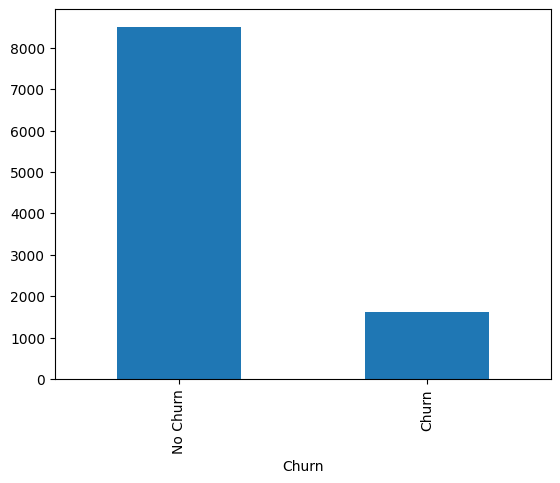

In [7]:
import matplotlib.pyplot as plt
df['Churn'].map({0:'No Churn', 1:'Churn'}).value_counts().plot(kind='bar')
plt.show()

In [3]:
# 0.2 Crear variable objetivo binaria "Churn"
#     Attrited Customer -> 1 ; Existing Customer -> 0
df['Churn'] = df['Attrition_Flag'].apply(lambda x: 1 if 'Attrited' in str(x) else 0)

# 0.3 Tamaño, columnas y balance de clases
print("Tamaño (filas, columnas):", df.shape)
print("Columnas:", df.columns.tolist())
print("\nBalance de clases:")
print(df['Churn'].value_counts().rename({0:'No Churn', 1:'Churn'}))
print(f"Proporción de 'Churn' = {100*df['Churn'].mean():.2f}%")

Tamaño (filas, columnas): (10127, 20)
Columnas: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Churn']

Balance de clases:
Churn
No Churn    8500
Churn       1627
Name: count, dtype: int64
Proporción de 'Churn' = 16.07%


Numéricas: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
Categóricas: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

== Reporte de clasificación ==
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2125
           1       0.49      0.82      0.62       407

    accuracy                           0.84      2532
   macro avg       0.73      0.83      0.76      2532
weighted avg       0.89      0.84      0.85      2532

Matriz de confusión:
[[1784  341]
 [  74  333]]
ROC-AUC: 0.9045


<Figure size 640x480 with 0 Axes>

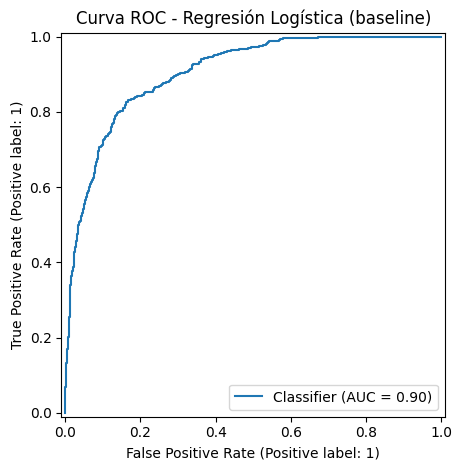

<Figure size 640x480 with 0 Axes>

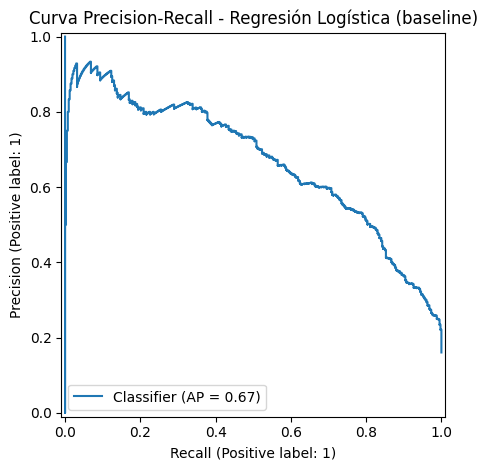

In [5]:
# Quitar identificadores y etiquetas 
drop_cols = ['CLIENTNUM', 'Attrition_Flag']  
X = df.drop(columns=drop_cols + ['Churn'])
y = df['Churn']

# 1.2 Identificar tipos de variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numéricas:", numeric_features)
print("Categóricas:", categorical_features)

# preprocesamiento: escalar numéricas y one-hot a categóricas
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("ohe", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# train/test split con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Pipeline del modelo
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# entrenar
log_reg.fit(X_train, y_train)

# predicciones y probabilidades
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# 1.8 Métricas
print("\n== Reporte de clasificación ==")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {auc:.4f}")

# graficas: ROC y Precision Recal
plt.figure()
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Curva ROC - Regresión Logística (baseline)")
plt.tight_layout()
plt.show()

plt.figure()
PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.title("Curva Precision-Recall - Regresión Logística (baseline)")
plt.tight_layout()
plt.show()

In [6]:
Ajustar umbral de decisión
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

def eval_umbral(y_true, y_scores, threshold=0.5):
    y_hat = (y_scores >= threshold).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_hat, average='binary', zero_division=0
    )
    return precision, recall, f1

ths = np.linspace(0.1, 0.9, 17)
rows = []
for t in ths:
    p, r, f1 = eval_umbral(y_test, y_proba, t)
    rows.append((t, p, r, f1))
res = pd.DataFrame(rows, columns=['threshold', 'precision', 'recall', 'f1']).sort_values('f1', ascending=False)
res.head(10)

,threshold,precision,recall,f1
11,0.65,0.571429,0.727273,0.640000
10,0.60,0.541012,0.761671,0.632653
12,0.70,0.602222,0.665848,0.632439
9,0.55,0.520900,0.796069,0.629738
13,0.75,0.634021,0.604423,0.618868
8,0.50,0.494065,0.818182,0.616096
14,0.80,0.681250,0.535627,0.599725
7,0.45,0.464578,0.837838,0.597721
15,0.85,0.740310,0.469287,0.574436
6,0.40,0.429988,0.852580,0.571664


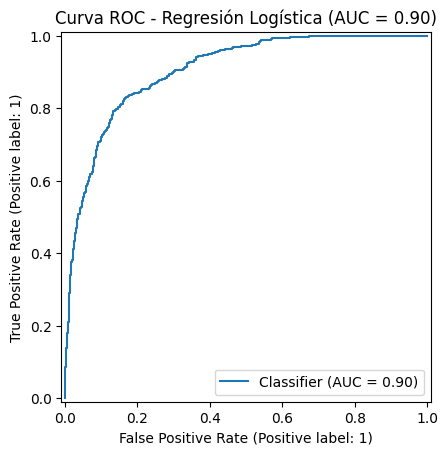

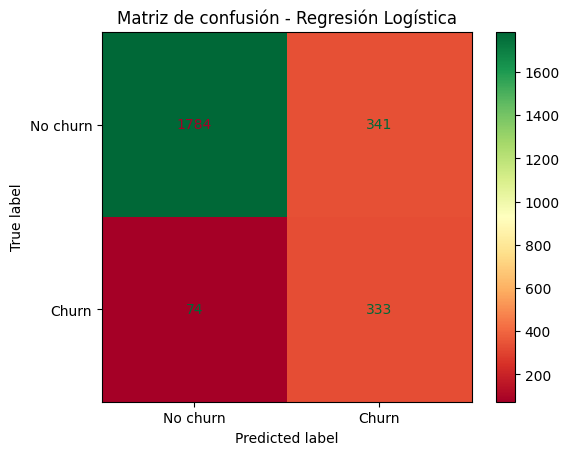

In [16]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt

# ROC
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Curva ROC - Regresión Logística (AUC = %.2f)" % roc_auc_score(y_test, y_proba))
plt.savefig("roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()

# MATRIZ DE CONFUSIÓN
disp = ConfusionMatrixDisplay.from_estimator(
    log_reg, 
    X_test, 
    y_test, 
    display_labels=["No churn", "Churn"],
    cmap="RdYlGn"   # Mapa de color rojo-amarillo-verde
)

plt.title("Matriz de confusión - Regresión Logística")
plt.savefig("conf_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_proba)